In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix

Load the csv into a DataFrame and investigate it to gain familiarity with the data.


In [3]:
df = pd.read_csv("tennis_stats.csv")
df.head()

Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2                  0.38                10   
3                        0.33     2                  0.33                 5   
4                        0.33     1                  0.00                 2   

   ...  ReturnGamesWon  ReturnPointsWon  ServiceGamesPlayed  ServiceGamesWon  \
0  ...            0.11             0.38                   8             0.50   
1  ...            0.00             0.20                   9             0.67   
2  ...            0.16             0.34                  17             0.65   
3  ...            0.14             0.34                  15             0.80   
4  ...            0.00             0.20                   2             0.50   

   TotalPointsWon  TotalServicePointsWon  Wins  Losses  Winnings  Ranking  
0            0.43                   0.50     1       2     39820      119  
1            0.41                   0.57     0       1     17334      381  
2            0.45                   0.59     4       1    109827      119  
3            0.49                   0.63     0       0      9761      125  
4            0.35                   0.50     0       1     32879      272  

[5 rows x 24 columns]

array([[<Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='FirstServe', ylabel='Year'>,
        <Axes: xlabel='FirstServePointsWon', ylabel='Year'>,
        <Axes: xlabel='FirstServeReturnPointsWon', ylabel='Year'>,
        <Axes: xlabel='SecondServePointsWon', ylabel='Year'>,
        <Axes: xlabel='SecondServeReturnPointsWon', ylabel='Year'>,
        <Axes: xlabel='Aces', ylabel='Year'>,
        <Axes: xlabel='BreakPointsConverted', ylabel='Year'>,
        <Axes: xlabel='BreakPointsFaced', ylabel='Year'>,
        <Axes: xlabel='BreakPointsOpportunities', ylabel='Year'>,
        <Axes: xlabel='BreakPointsSaved', ylabel='Year'>,
        <Axes: xlabel='DoubleFaults', ylabel='Year'>,
        <Axes: xlabel='ReturnGamesPlayed', ylabel='Year'>,
        <Axes: xlabel='ReturnGamesWon', ylabel='Year'>,
        <Axes: xlabel='ReturnPointsWon', ylabel='Year'>,
        <Axes: xlabel='ServiceGamesPlayed', ylabel='Year'>,
        <Axes: xlabel='ServiceGamesWon', ylabel='Year'>,
        <Ax

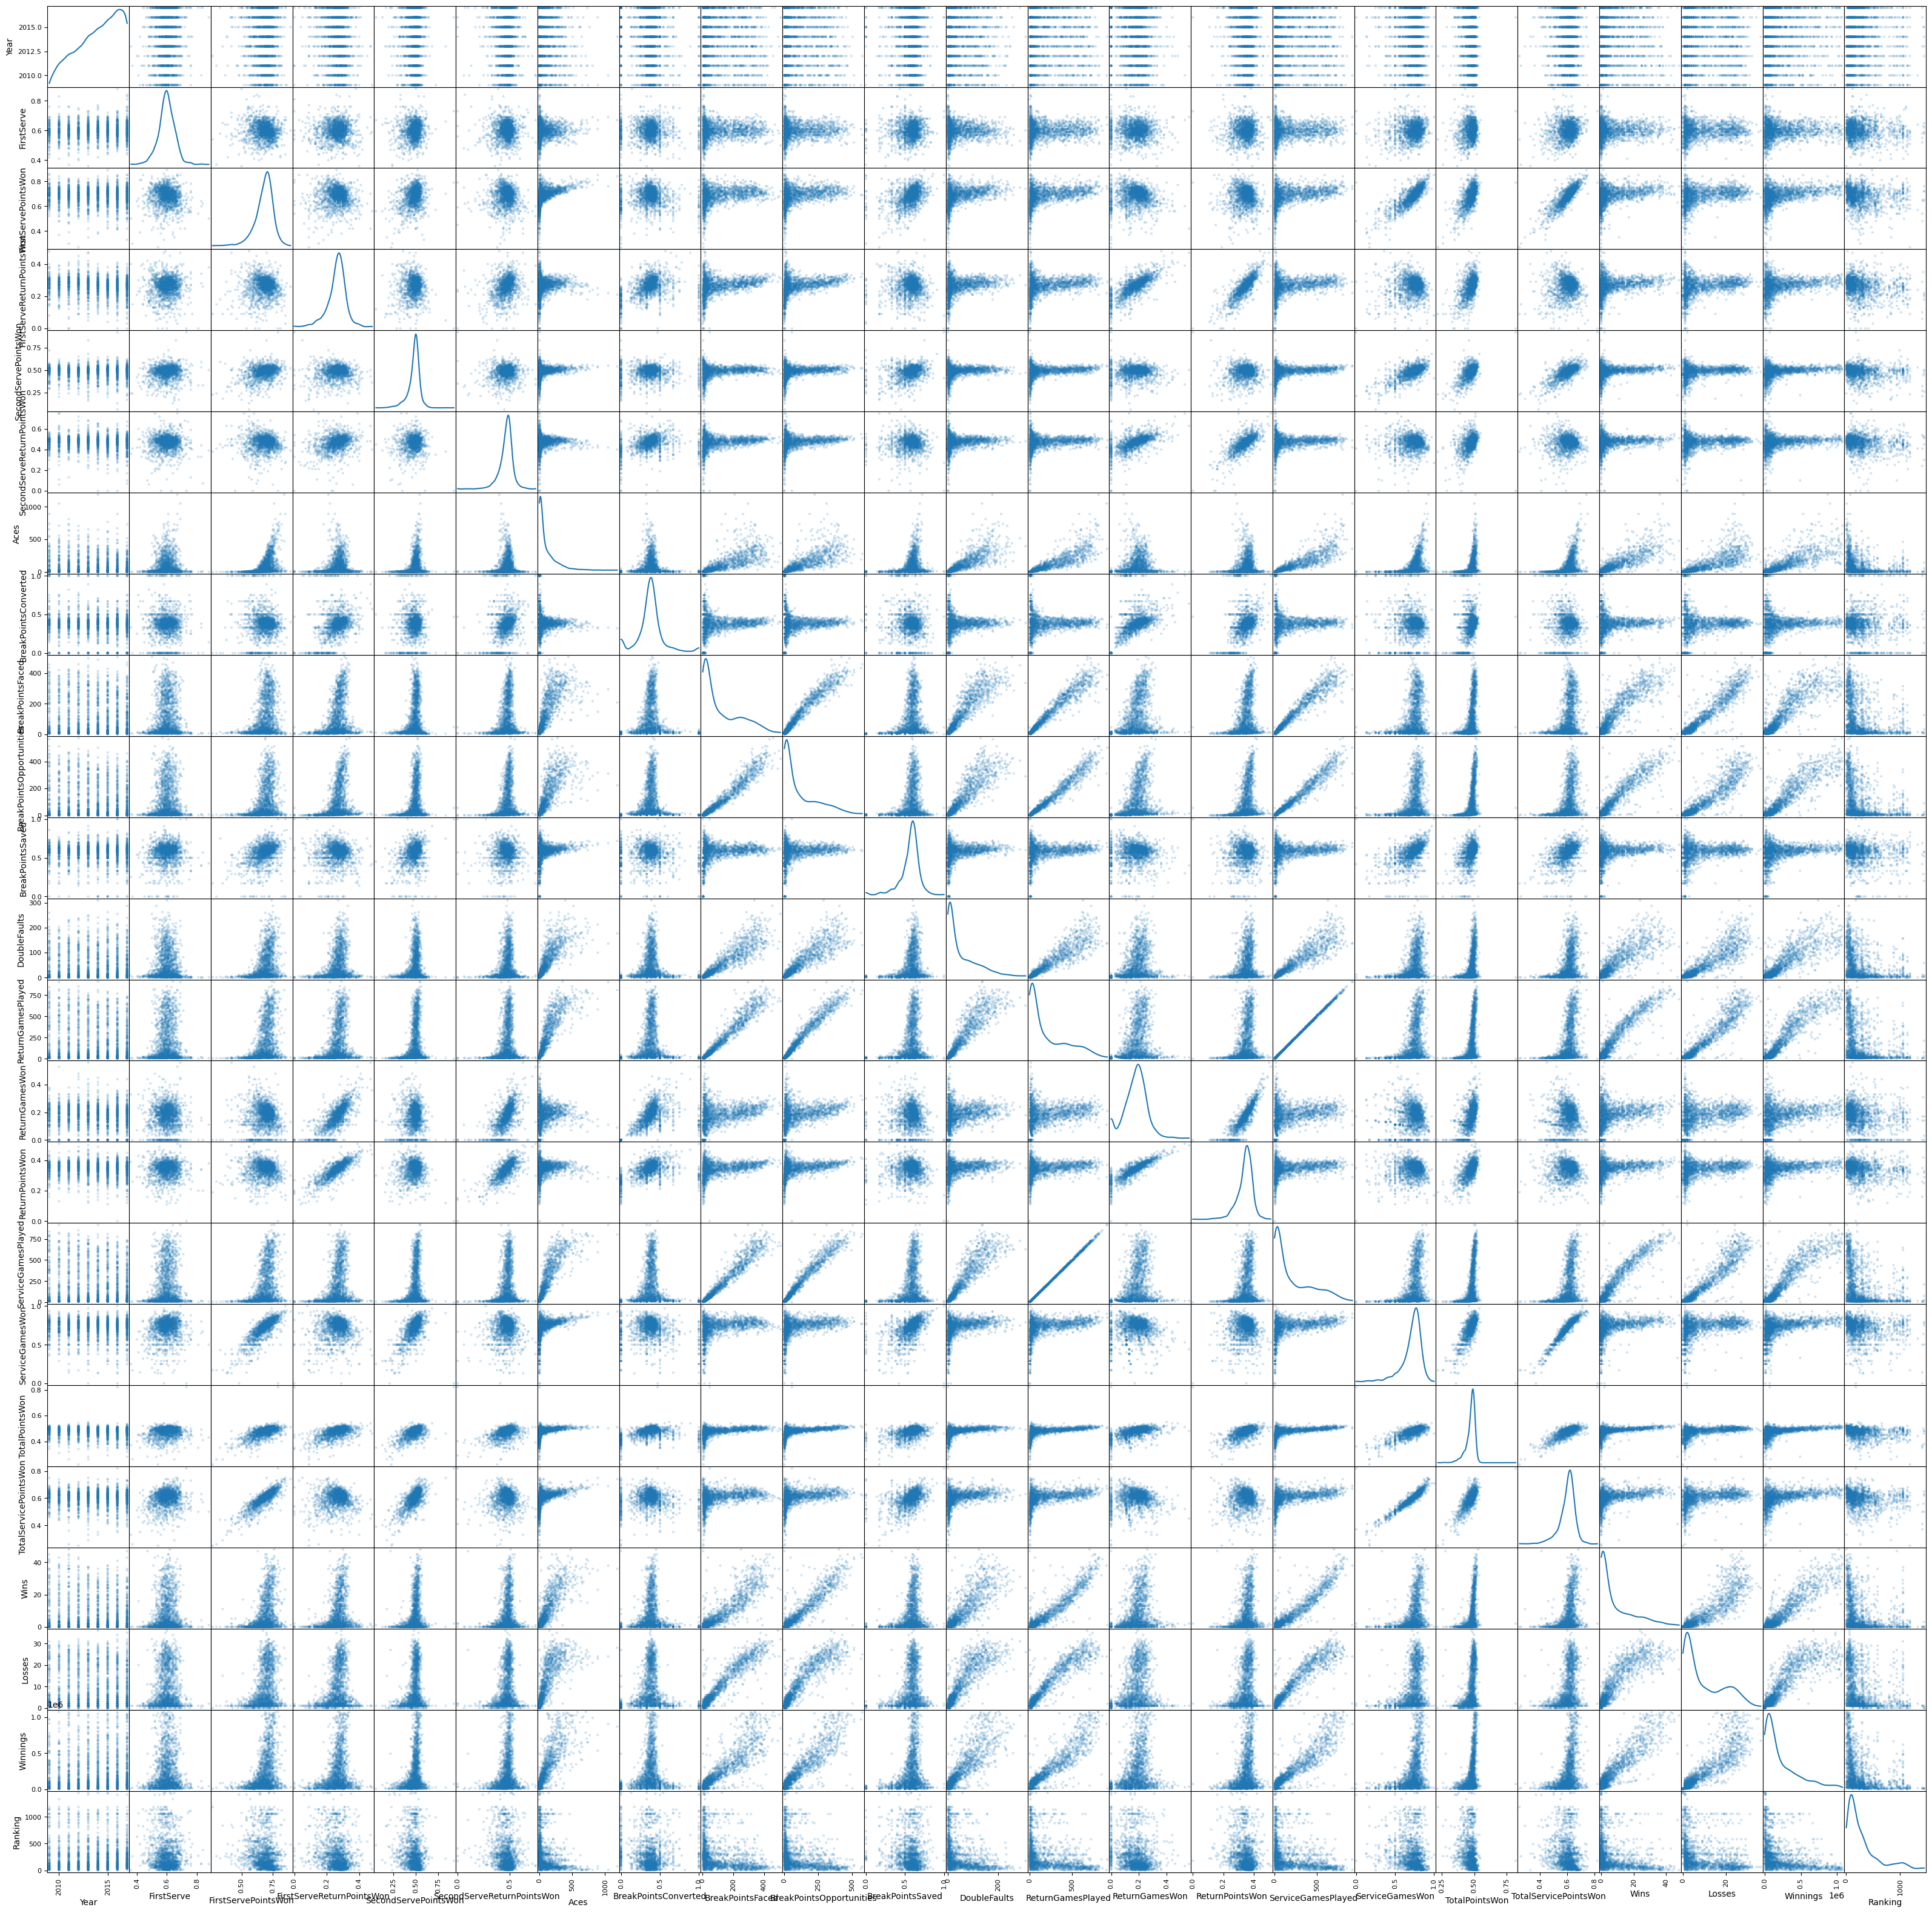

In [10]:
scatter_matrix(df, alpha=0.2, figsize=(40, 40), diagonal="kde")

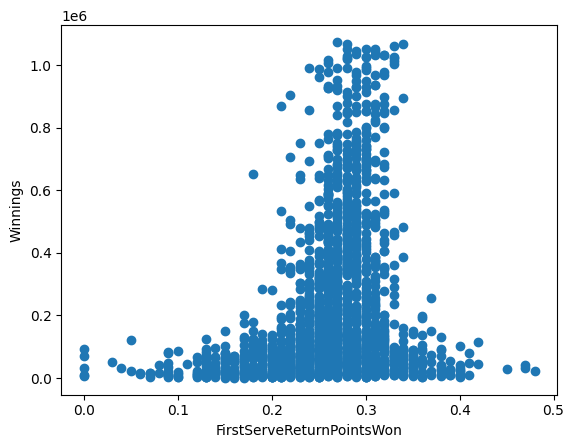

In [13]:
plt.scatter(df["FirstServeReturnPointsWon"], df["Winnings"])
plt.xlabel("FirstServeReturnPointsWon")
plt.ylabel("Winnings")
plt.show()

Set the features as X and y


In [21]:
X = df[["FirstServeReturnPointsWon"]]
y = df[["Winnings"]]

Create test and train sets


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

Create linear regression model and train


In [23]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

See how well it did


In [24]:
lrm.score(X_test, y_test)

0.07542979099475922

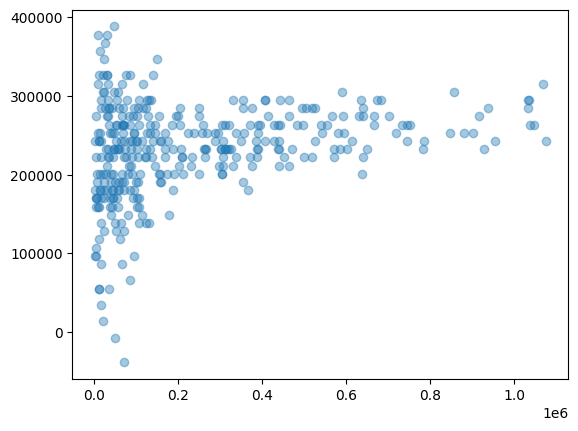

In [25]:
prediction = lrm.predict(X_test)
plt.scatter(y_test, prediction, alpha=0.4)

Create another


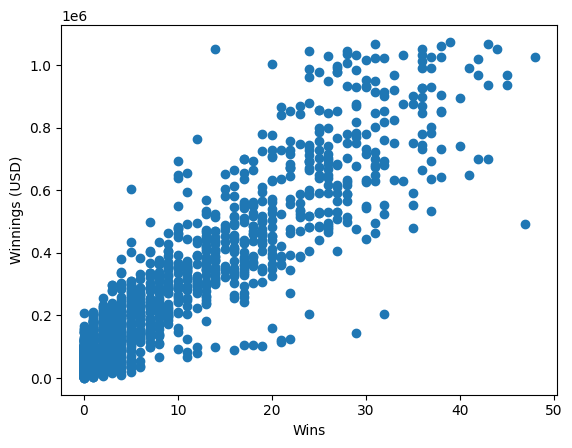

In [43]:
plt.scatter(df["Wins"], df["Winnings"])
plt.xlabel("Wins")
plt.ylabel("Winnings (USD)")
plt.show()

In [47]:
X2 = df[["Wins"]]
y2 = df[["Winnings"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size=0.8)

lrm2 = LinearRegression()
lrm2.fit(X_train2, y_train2)
lrm2.score(X_test2, y_test2)

0.8333028542494009

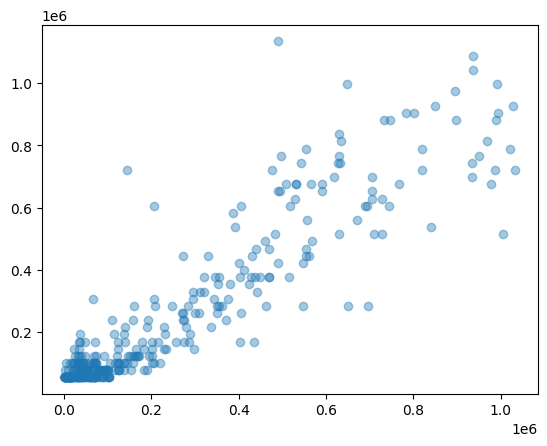

In [73]:
prediction = lrm2.predict(X_test2)
plt.scatter(y_test2, prediction, alpha=0.4)
plt.show()

In [67]:
print(lrm2.coef_[0][0], lrm2.intercept_[0])

22978.117268699552 54871.016150032025


Using multiple metrics


In [78]:
X3 = df[["BreakPointsOpportunities", "FirstServeReturnPointsWon"]]
y3 = df[["Winnings"]]

In [79]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, train_size=0.8)

In [80]:
lrm3 = LinearRegression()
lrm3.fit(X_train3, y_train3)

LinearRegression()

In [81]:
lrm3.score(X_test3, y_test3)

0.8387624854804354

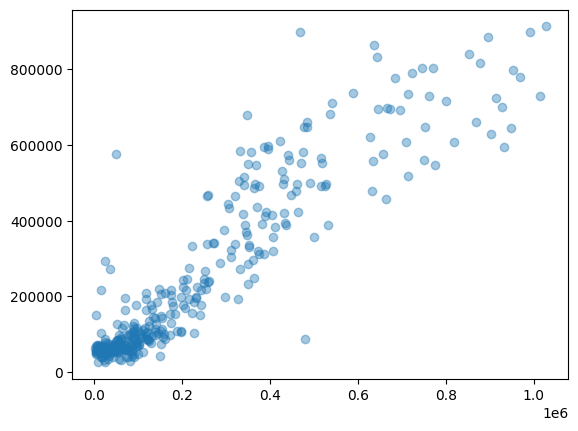

In [82]:
prediction = lrm3.predict(X_test3)
plt.scatter(y_test3, prediction, alpha=0.4)
plt.show()